In [16]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
start = '2017-01-01'
end = '2022-01-01'

In [18]:
data = pd.read_excel('C:/Users/User/Downloads/gulf.xlsx', index_col= 'Date', parse_dates= True)

In [19]:
df = data.iloc[:,-4:]

In [20]:
df = df.pct_change().dropna()

In [21]:
df = df[['P/E', 'PEG', 'P/BV', 'Close']]

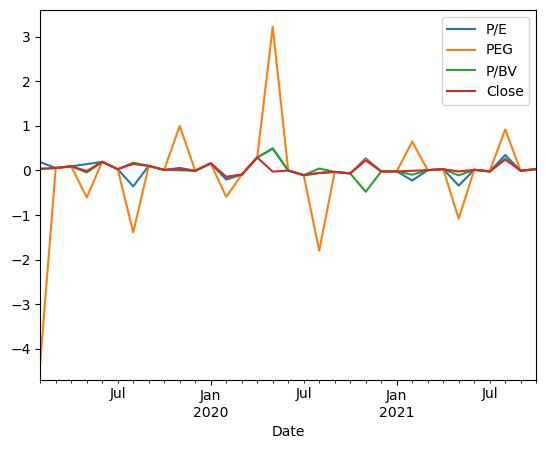

In [22]:
df.plot()
plt.show()

In [23]:
df.describe()

,P/E,PEG,P/BV,Close
count,33.000000,33.000000,33.000000,33.000000
mean,0.029463,-0.093832,0.023353,0.032537
std,0.177421,1.093717,0.158182,0.101010
min,-0.356444,-4.312102,-0.479259,-0.140042
25%,-0.031811,-0.066998,-0.032150,-0.021898
50%,0.012546,0.006784,0.008210,0.007519
75%,0.103370,0.097345,0.056818,0.054749
max,0.496808,3.224638,0.486989,0.291639


## ลองวิธีที่ 1 คือทำ Encoding ด้วยวิธีที่ไม่สนคุณค่าของแต่ละคอลลัม ใช้เป็น all up/ all down (LE รวมทุก column)
### วิธีที่ 2 คือการทำ LE แยกแต่ละ column ใช้วิธี one hot encoding, .fit_transform

In [ ]:
# วิธีที่ 1 
df['all_up'] = 0

In [ ]:
# close+, and all up = 2
df.loc[(df['Close'] > 0) & (df['P/E'] > 0) & (df['PEG'] > 0) & (df['P/BV'] > 0), 'all_up'] = 1

#close+, and some in X up = 1


#close-, and some in X down = -1

#close- and all down = -2
df.loc[(df['Close'] > 0) & (df['P/E'] > 0) & (df['PEG'] > 0) & (df['P/BV'] > 0), 'all_up'] = -1


In [ ]:
# method 2

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder

enc.fit_transform(df.iloc[:, :-1])






TypeError: fit_transform() missing 1 required positional argument: 'X'

In [34]:
# ลองแบบหยาบ 0 1
df['profit'] = 0
df['profit'] = df.Close.apply(lambda x: 1 if x > 0 else 0)

In [36]:
df.head()

,P/E,PEG,P/BV,Close,profit
Date,,,,,
2019-02-01,0.187558,-4.312102,0.029240,0.040698,1
2019-03-01,0.055207,0.055769,0.056818,0.054749,1
2019-04-01,0.094233,0.092896,0.093190,0.094280,1
2019-05-01,0.142217,-0.605000,-0.044262,-0.014037,0
2019-06-01,0.194197,0.194093,0.193825,0.193913,1


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

In [90]:
# เก็บ data บางส่วนออกจาก train test splitไว้สำหรับทำ live_data 
X = df.iloc[:,:-2] # เอา3 colแรก
y = df.iloc[:,-1:] # only last column

# ลองแบบไม่แบ่งไว้ทำ live data

In [91]:
X_train, X_test, y_train, y_test, =train_test_split(X, y, test_size=0.2, random_state=0)


In [1]:
## ต้องแก้ ไม่ใช่ทำ return เป็น encode แต่ให้ encode พวก PE

In [92]:
model = LogisticRegression()
logreg = model.fit(X_train, y_train)

# (ผิด) ต้อง encoded data ด้วยวิธีต่างๆ เช่นกรณีนี้ ใช้เป็น label encoding Close(y) อาจให้เป็น ขาดทุน-1, เท่าทุน0, กำไร1
# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous0-using-sklearn-in-python

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [93]:
y_pred = logreg.predict(X_test)

In [96]:
y_pred

array([1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [99]:
y_test['pred'] = y_pred

<ipython-input-99-73c49561539d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['pred'] = y_pred


In [100]:
y_test

,profit,pred
Date,,
2020-01-01,1,1
2020-10-01,0,0
2021-02-01,0,0
2020-07-01,0,0
2019-04-01,1,1
2021-03-01,1,0
2021-04-01,1,0


In [95]:
print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
metrics.r2_score(y_test, y_pred)

MAE =  0.2857142857142857
MSE =  0.2857142857142857
RMSE =  0.5345224838248488


-0.16666666666666674

In [81]:
live_data = logreg.predict(df.iloc[-6:, :-2])
live_data

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [88]:
test = df.iloc[-6:]
test['pred'] = live_data

<ipython-input-88-820decd95d07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = live_data


In [89]:
test

,P/E,PEG,P/BV,Close,profit,pred
Date,,,,,,
2021-05-01,-0.337988,-1.082461,-0.109177,-0.021739,0,1
2021-06-01,0.014861,0.015873,0.015986,0.014815,1,0
2021-07-01,-0.021886,-0.015625,-0.022727,-0.021898,0,0
2021-08-01,0.347231,0.920635,0.266547,0.246269,1,0
2021-09-01,-0.005974,-0.008264,-0.005650,-0.005988,0,0
2021-10-01,0.030172,0.033333,0.029830,0.030120,1,0


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
X, y =load_iris(return_X_y= True)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3